# **Credit Card Payment Default Prediction**

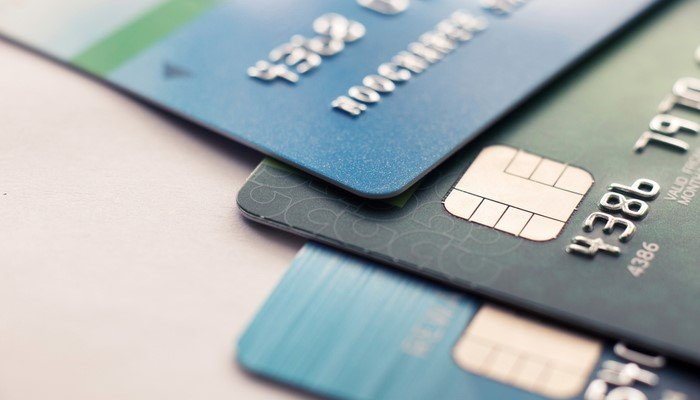


[Source Gambar](https://www.google.com/url?sa=i&url=https%3A%2F%2Fchurchillcreditsolutions.com%2Fcoronavirus-financial-crisis-dont-default-on-your-credit-card-debt-without-a-plan%2F&psig=AOvVaw3UF3AOkJA5a2sT1BMZAsd6&ust=1635774657089000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCJiBkNjl9PMCFQAAAAAdAAAAABAD)

## ***Introduction***

Final Project ini dikerjakan oleh *Kelompok 8 (Incognito) Rakamin Data Science Final Project*. Anggota kelompok terdiri dari 4 orang, yaitu:


*   Achmad Dwi Cahya
*   Anggoletomi Marlis Putra
*   Alvin Noza P.H
*   Mangerbang

Final Project ini menggunakan dataset dari [Credit Card Payment Default Prediction Hackathon](https://www.kaggle.com/reverie5/av-janata-hack-payment-default-prediction?select=train_20D8GL3.csv). Di dalam dataset ini, terdapat informasi mengenai default payment, faktor demografik, data kredit, riwayat pembayaran dan tagihan client pengguna kartu kredit di Taiwan dalam rentang April sampai September tahun 2005. Goal dari project ini adalah untuk memprediksi client mana yang akan mengalami default payment pada bulan berikutnya dari menggunakan model yang dibuat.

## **First Stage**

### A. Import packages dan load dataset ke dalam notebook

In [1]:
#import packages yang dibutuhkan ke dalam notebook
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

from sklearn.inspection import permutation_importance
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,\
roc_auc_score, roc_curve, precision_recall_curve, fbeta_score, recall_score,\
precision_recall_fscore_support
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report
import lightgbm as lgb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#connect notebook ke google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
 #load dataset train dan test
df = pd.read_csv("/content/gdrive/MyDrive/final-project/datasets/train_20D8GL3.csv")

print("dataset's shape: ", df.shape)

dataset's shape:  (21000, 25)


#### **Explorasi dataset**

Kami memulai eksplorasi dengan melihat lima baris pertama di dataset df.

In [4]:
#menampilkan lima baris pertama dari dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


Sebelum melihat lebih dalam, kami akan coba untuk melihat ringkasan, karakteristik, dan deksriptif statistik dari dataset.

In [5]:
#menampilkan ringkasan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [6]:
#menampilkan deskriptif statistik dari dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


#### **Deskripsi Dataset**

dataset ini memiliki 25 kolom (23 features + id + target "defult_payment_next_month") dan 21000 baris entry. Dari dataframe ini, secara general tidak terdapat missing/null values. Rata-rata dari limit kredit yang dimiliki nasabah adalah sebesar 167214 NT Dollar, sedangkan nilai maksimumnya adalah 800000 NT Dollar. Tingkat pendidikan pemegang kartu kredit kebanyakan graduate school dan university. Rata-rata usia pemegan kartu kredit adalah 35,4 tahun dengan usia termuda adalah 21 tahun dan usia tertua adalah 75 tahun. Pada kolom target, *default_payment_next_month*, kami melihat jika sebanyak 22,1 % nasabah akan default pada bulan depan. Kolom yang ada di dalam dataframe kemungkinan memiliki hubungan yang kuat atau justru hubungan yang lemah terhadap kolom target, *default_payment_next_month*. Maka dari itu, kami akan mengeksplorasinya untuk memahami lebih lanjut.

#### **Deskripsi Kolom/Features**

*   **ID**: Unique id setiap client
*   **LIMIT_BAL**: Jumlah limit kredit yang diberikan/yang dapat digunakan (New Taiwan Dollar)
* **SEX**: Jenis kelamin (1=pria, 2=wanita)
* **EDUCATION**: Tingkat pendidikan (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARIAGE**: Status pernikahan (1=menikah, 2=single, 3=lainnya)
* **AGE**: Usia client
* **PAY_0**: Status pembayaran pada bulan September tahun 2005 (-1=pembayaran tepat waktu, 1=pembayaran telat satu bulan, 2= pembayaran telat dua bulan,....8=pembayaran telat delapan bulan)
* **PAY_2**: Status pembayaran pada bulan Agustus tahun 2005 (skala sama seperti di atas)
* **PAY_3**: Status pembayaran pada bulan Juli tahun 2005 (skala sama seperti di atas)
* **PAY_4**: Status pembayaran pada bulan Juni tahun 2005 (skala sama seperti di atas)
* **PAY_5**: Status pembayaran pada bulan Mei tahun 2005 (skala sama seperti di atas)
* **PAY_6**: Status pembayaran pada bulan April tahun 2005 (skala sama seperti di atas)
* **BILL_AMT1**: Jumlah dari bill statement/tagihan pada bulan September tahun 2005 (New Taiwan Dollar)
* **BILL_AMT2**: Jumlah dari bill statement/tagihan pada bulan Agustus tahun 2005 (New Taiwan Dollar)
* **BILL_AMT3**: Jumlah dari bill statement/tagihan pada bulan Juli tahun 2005 (New Taiwan Dollar)
* **BILL_AMT4**: Jumlah dari bill statement/tagihan pada bulan Juni tahun 2005 (New Taiwan Dollar)
* **BILL_AMT5**: Jumlah dari bill statement/tagihan pada bulan Mei tahun 2005 (New Taiwan Dollar)
* **BILL_AMT6**: Jumlah dari bill statement/tagihan pada bulan April tahun 2005 (New Taiwan Dollar)
* **PAY_AMT1**: Jumlah pembayaran sebelumnya pada bulan September tahun 2005 (New Taiwan Dollar)
* **PAY_AMT2**: Jumlah pembayaran sebelumnya pada bulan Agustus tahun 2005 (New Taiwan Dollar)
* **PAY_AMT3**: Jumlah pembayaran sebelumnya pada bulan Juli tahun 2005 (New Taiwan Dollar)
* **PAY_AMT4**: Jumlah pembayaran sebelumnya pada bulan Juni tahun 2005 (New Taiwan Dollar)t
* **PAY_AMT5**: Jumlah pembayaran sebelumnya pada bulan Mei tahun 2005 (New Taiwan Dollar)
* **PAY_AMT6**: Jumlah pembayaran sebelumnya pada bulan April tahun 2005 (New Taiwan Dollar)
* **default_payment_next_month**: Target variable, status dafault payment (1=yes, 0=no)



**Catatan Tambahan**:
Berdasarkan deskripsi dari metadata dataset di Kaggle, value -1 di kolom PAY_0 sampai PAY_6 mengindikasikan pembayaran tagihan tepat waktu, sedangan value 1 sampai 8 mengindikasikan pembayaran tagihan yang telat. Namun seperti dilihat di atas saat kami memanggil fungsi describe untuk dataset yang kami punya, terdapat value -2 dan value 0. Dari hasil eksplorasi, dapat diketahui jika value -2 mengindikasikan tidak memiliki jumlah tagihan, sedangkan value 0 mengindikasikan pembayaran sebagian dari tagihan. Jika kita memvisualisasikan jumlah value seperti di bawah ini, dua value ini (-2 dan 0) adalah value dengan jumlah yang banyak sehingga kami tidak dapat mengabaikannya.

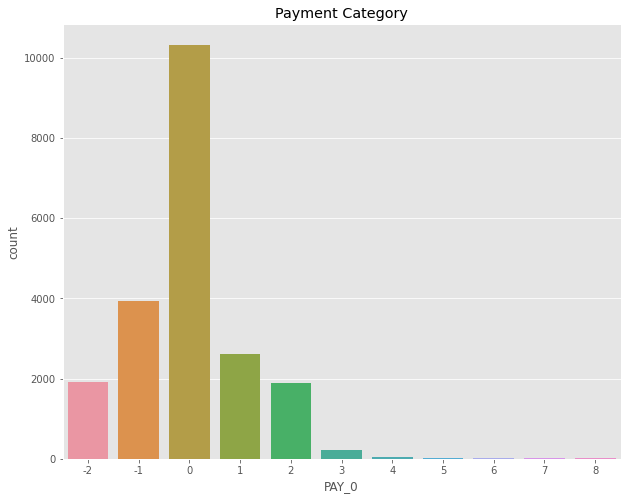

In [7]:
plt.figure(figsize = (10,8))
plt.title('Payment Category')
sns.countplot(data=df, x="PAY_0")

plt.show()

### B. Data Preprocessing

#### **Deteksi Missing Values**

Melakukan pengecekan apakah terdapat missing values di dalam dataset

In [8]:
def missing_val(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('Kolom {} mempunyai {} missing/null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Dari {} total kolom, {} memiliki missing/null values; {}% kolom memiliki missing/null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [9]:
#memanggil fungsi
missing_val()

Dari 25 total kolom, 0 memiliki missing/null values; 0.0% kolom memiliki missing/null values.


Dari hasil pengecekan missing value di atas menggunakan fungsi di atas, tidak terdapat missing value sama sekali di dalam dataset. Langkah selanjutnya adalah pengecekan data duplikat.

#### **Deteksi Duplicated Values**

Pada sesi ini, kami hanya akan melakukan pengecekan duplikat values pada kolom `ID`. Values yang terduplikat pada kolom ini kemungkinan besar akan memiliki values yang sama pada kolom lainnya dengan values yang asli.

In [10]:
#cek duplicate values
id_count = df["ID"].value_counts(ascending=False)
dup_id = id_count[id_count > 1].count()

print("Terdapat {} id yang muncul lebih dari satu kali di dalam dataset".format(dup_id))

Terdapat 0 id yang muncul lebih dari satu kali di dalam dataset


In [11]:
#cek jumlah unik dari kolom ID
#jika jumlah unik == jumlah baris di dalam dataset, maka tidak ada data duplikat
uniq_id = df["ID"].nunique()

print("Total unique pada kolom ID: ", uniq_id)

Total unique pada kolom ID:  21000


Dari 21000 baris entry pada dataset, tidak terdapat satupun data yang duplikat setelah kami melakukan pengecekannya menggunakan dua pendekatan.

#### **Deteksi Outlier Values**

Setelah melakukan pengecekan missing values dan duplicated values pada dataset, kami akan coba melakukan pengecekan outlier values dari dataset ini.

Dalam mendeteksi outliers, kami akan menggunakan dua pendekatan. Pertama menggunakan fungsi metode Tukey, yang kedua adalah dengan membuat visualisasi penyebaran valuesnya.

In [12]:
#mendefinisikan fungsi
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Jumlah outlier: {}'.format(outlier_count))
    print('Persentase data yang merupakan outlier: {}%'.format(outlier_percent))

Dengan menggunakan fungsi di atas, sesuai dengan metode John Tukey, kami akan menganggap semua values yang dianggap outliers adalah values yang berada di luar 1.5 dikali IQR. Kami hanya akan mengecek outliers pada kolom dengan tipe data kontinu.

In [13]:
#mengambil kolom dengan tipe data kontinu dari dataset
list_cols = list(df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
                           'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

for col in list_cols:
    outlier_count(col)

---------------LIMIT_BAL---------------
Jumlah outlier: 111
Persentase data yang merupakan outlier: 0.53%
---------------BILL_AMT1---------------
Jumlah outlier: 1663
Persentase data yang merupakan outlier: 7.92%
---------------BILL_AMT2---------------
Jumlah outlier: 1655
Persentase data yang merupakan outlier: 7.88%
---------------BILL_AMT3---------------
Jumlah outlier: 1696
Persentase data yang merupakan outlier: 8.08%
---------------BILL_AMT4---------------
Jumlah outlier: 1789
Persentase data yang merupakan outlier: 8.52%
---------------BILL_AMT5---------------
Jumlah outlier: 1906
Persentase data yang merupakan outlier: 9.08%
---------------BILL_AMT6---------------
Jumlah outlier: 1879
Persentase data yang merupakan outlier: 8.95%
---------------PAY_AMT1---------------
Jumlah outlier: 1905
Persentase data yang merupakan outlier: 9.07%
---------------PAY_AMT2---------------
Jumlah outlier: 1903
Persentase data yang merupakan outlier: 9.06%
---------------PAY_AMT3---------------
J

Dari hasil pengecekan outliers menggunakan metode di atas, kami melihat jika `LIMIT_BAL` memilik outliers paling kecil, hanya sebesar 0.53% atau sebanyak 111 outliers. Sedangkan untuk kolom yang memiliki outliers paling besar adalah kolom `PAY_AMT6` sebesar 9.82% atau sebanyak 2063 outliers.

Selain menggunakan metode di atas, kami akan coba untuk mendeteksi outlier values dengan visualisasi boxplot atau histogram agar dapat melihat penyebaran datanya.

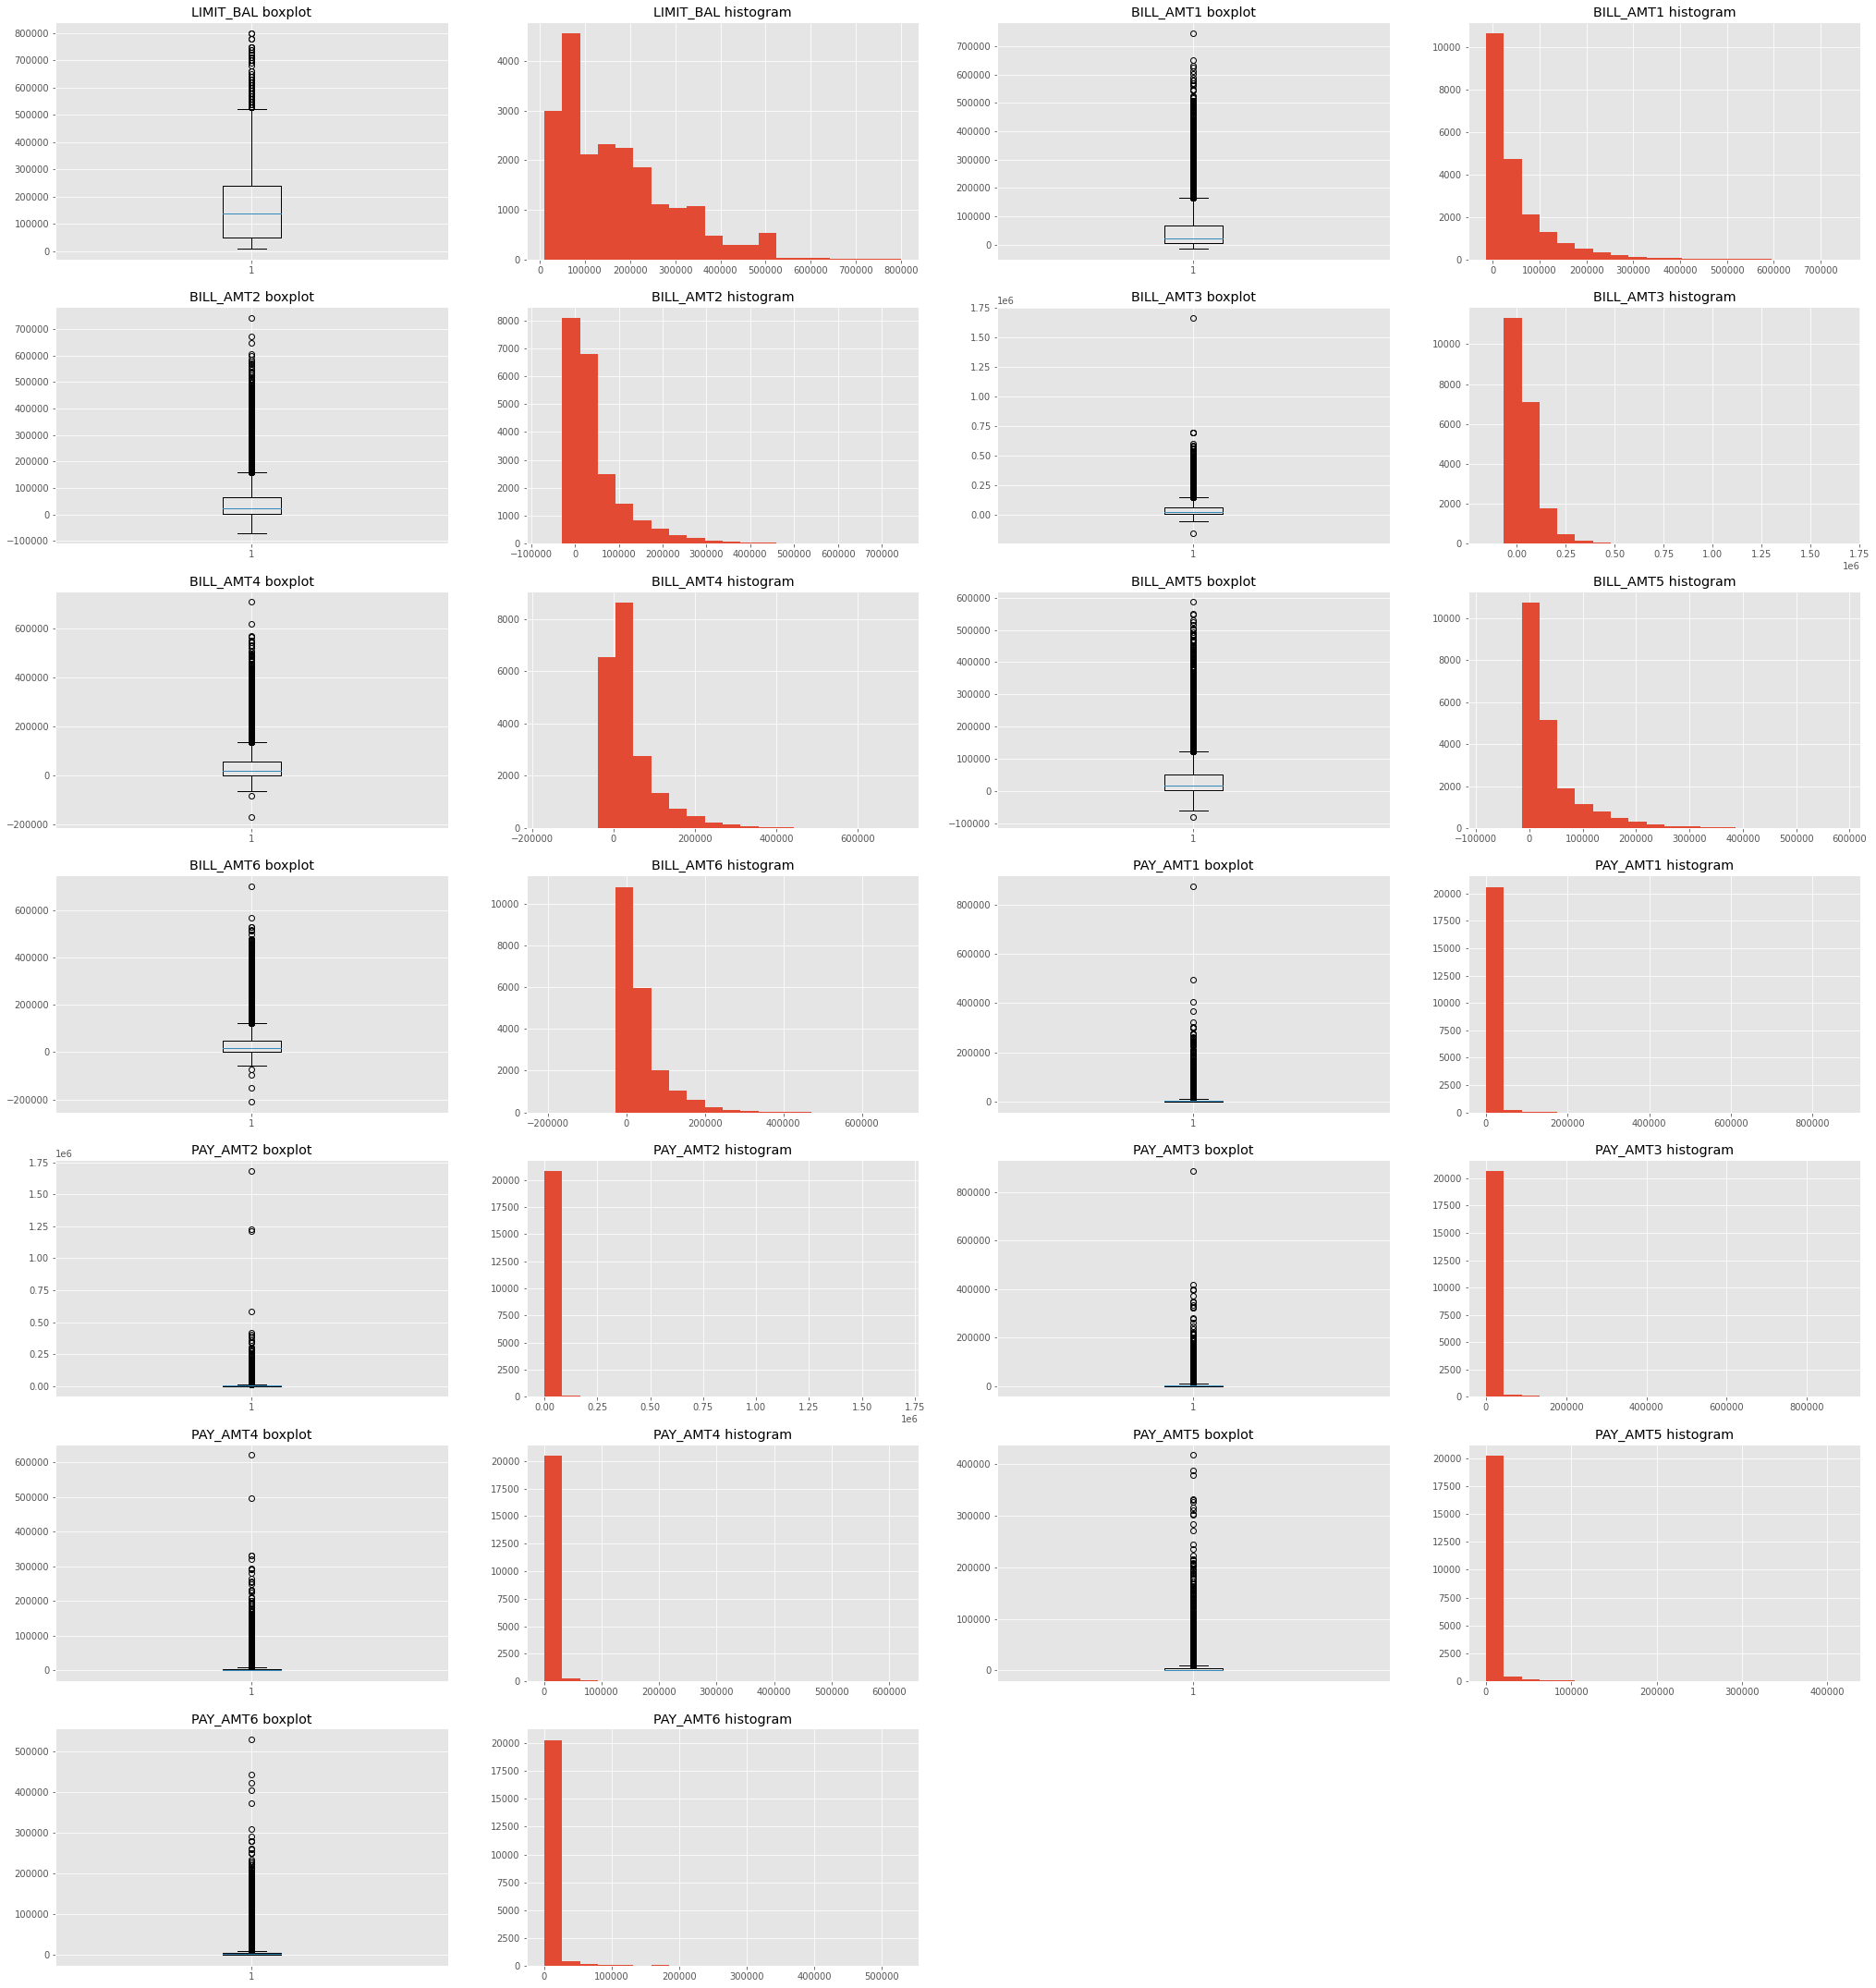

In [14]:
def outliers_detect(data):
    plt.figure(figsize=(35, 50))
    i = 0
    for col in list_cols:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        plt.grid(True)
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col], bins=20)
        plt.title('{} histogram'.format(col))
        plt.grid(True)
    plt.show()

outliers_detect(df)

Dari visualisasi outliers di atas, kami melihat jika outlier values pada `LIMIT_BAL` berada sekitar di atas 520000 NT Dollar. Lalu pada `BILL_AMT1` sampai `BILL_AMT6` terdapat outlier values yang berada di bawah nilai 0.

#### **Deteksi Imbalanced Data**

Melakukan pengecekan class imbalance pada target.

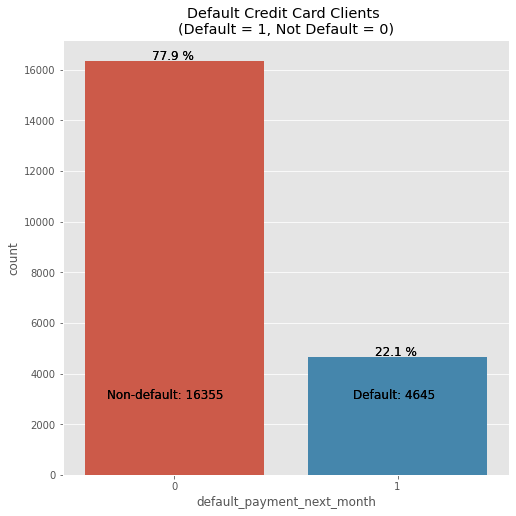

In [15]:
#hitung frekuensi default
yes = df.default_payment_next_month.sum()
no = len(df)-yes

#hitung persentase default
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

plt.figure(figsize = (8,8))
plt.title('Default Credit Card Clients \n(Default = 1, Not Default = 0)')
ax=sns.countplot(x=df['default_payment_next_month'], data=df);
for p in ax.patches:
    ax.annotate('Non-default: {}'.format(no), xy=(1, 15000), xytext=(-0.3, 3000), size=12)
    ax.annotate('Default: {}'.format(yes), xy=(1, 15000), xytext=(0.8, 3000), size=12)
    plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 16400), size=12)
    plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 4700), size=12)
locs, labels = plt.xticks()
plt.show()

Terdapat class imbalance pada kolom target di dataset. Kami sementara waktu memutuskan untuk tidak melakukan apapun lebih dulu pada class imbalance ini sampai nanti kami mengevaluasi model yang kami buat.

#### **Feature Engineering**

Setelah beberapa tahapan data cleaning di atas selesai, kami akan melakukan feature engineering pada dataset train.

In [16]:
#menampilkan lima baris pertama dari dataset
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,25150,13470,3092,13973,10567,28050,23327,10728,17227,22039
LIMIT_BAL,360000,240000,320000,50000,80000,150000,260000,50000,130000,60000
SEX,2,2,2,2,1,2,2,2,2,2
EDUCATION,2,1,2,2,3,1,1,2,2,3
MARRIAGE,2,2,1,2,1,2,1,1,2,2
AGE,25,46,41,24,52,29,36,31,24,28
PAY_0,-1,2,0,-1,-1,-2,0,0,0,-1
PAY_2,-1,2,0,-1,0,-2,0,0,0,-1
PAY_3,-1,-2,0,-2,0,-2,0,0,0,0
PAY_4,-1,-1,0,-2,0,-2,0,0,0,0


Meskipun dataset yang kami gunakan sudah bersih dan telah di-encoding pada kolom dengan tipe data nominal, terdapat beberapa ketidaksesuaian dengan deskripsi dan pengulangan ataupun anomali pada kategorinya. Misalnya pada kolom MARRIAGE terdapat value 0, padahal seharusnya kolom tersebut hanya memiliki tiga kategori, yaitu 1:menikah, 2:single, dan 3:lainnya. Kemudian pada kolom EDUCATION, terdapat kategori yang sebenarnya bisa saja merepresentasikan informasi yang sama, yaitu 4: others, 5: unknown, and 6: unknown.

Pada sub-bagian Feature Engineering ini, kami akan mencoba untuk melakukan perubahan dan penambahan feature pada dataframe.

In [17]:
#rename kolom
df.rename(columns={"default_payment_next_month": "DEFAULT",
                   "SEX": "GENDER"}, inplace=True)
#hapus kolom ID
df.drop(columns="ID", axis=1, inplace=True)

**Kolom Marriage**

In [18]:
#cek unik values pada kolom
df['MARRIAGE'].unique()

array([2, 1, 3, 0])

Kolom `MARRIAGE` seharusnya hanya memiliki tiga kategori, yaitu 1:menikah, 2:single, dan 3:lainnya. Dari pengecekan unik values di atas, terdapat nilai 0 pada kolom ini. Karena kami tidak mengetahui apa yang direpresentasikan oleh nilai ini, maka kami akan menggabungkannya ke dalam kategori 3.


In [19]:
#menggabungkan value 0 ke kategori 3
df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

#cek kembali unik values
df['MARRIAGE'].unique()

array([2, 1, 3])

In [20]:
#ubah value menjadi kategorikal agar dapat dipisahkan pada saat encoding
#df['MARRIAGE'].replace(to_replace=[1,2,3], value=['MARRIED', 'SINGLE', 'OTHERS'], inplace=True)

**Kolom Education**

In [21]:
#cek unik values pada kolom
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

Kami menganggap kategori 0, 5, dan 6 dapat digabungkan ke dalam satu kategori yaitu kategori 4.

In [22]:
#menggabungkan value 0, 5, dan 6 ke dalam kategori 4
df["EDUCATION"] = np.where(df["EDUCATION"] == 0, 4, df["EDUCATION"])
df["EDUCATION"] = np.where(df["EDUCATION"] == 5, 4, df["EDUCATION"])
df["EDUCATION"] = np.where(df["EDUCATION"] == 6, 4, df["EDUCATION"])

#cek unik values
df["EDUCATION"].unique()

array([2, 1, 3, 4])

In [23]:
#ubah value menjadi kategorikal agar dapat dipisahkan pada saat encoding
#df["EDUCATION"].replace(to_replace=[1,2,3,4], value=["GRADUATE_SCHOOL", "UNIVERSITY", "HIGH_SCHOOL", "OTHERS"], inplace=True)

**Kolom Age**

Kami membuat kolom baru `AGE_GROUP` hasil pengelompokkan usia pada kolom `AGE` berdasarkan kepala usia. Karena usia yang paling muda adalah 21, maka kami akan memulainya dari kelompok usia 20an.

In [24]:
#mengelompokkan usia menjadi kategorikal agar dapat dipisahkan pada saat encoding
#df['AGE_GROUP'] = pd.cut(x=df['AGE'], bins=[20, 29, 39, 49, 59, 69, 79], labels=['20s','30s', '40s', '50s', '60s', '70s'])

**One-Hot Encoding**

In [25]:
#copy dataframe
df_ohe = df.copy()

In [26]:
df_ohe.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [27]:
#memisahkan features dan target
features = df_ohe[['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                   'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]]

target = df_ohe['DEFAULT']

In [28]:
#Memisahkan kolom bertipe kategorikal (nominal dan ordinal) dengan kolom bertipe numerikal (diskret dan kontinuu)
kategorikal = ['GENDER','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
numerikal = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Untuk memudahkan pada saat pemrosesan oleh algoritma, kami akan menggunakan One-Hot Encoding untuk mengubah setiap kolom yang merupakan kategorikal ke kolom baru dengan nilai 1 atau 0 (notasi untuk true/false). 


In [29]:
#melakukan OHE
for kat in kategorikal:
    dum_df = pd.get_dummies(df_ohe[kat], prefix=kat)
    df_ohe = df_ohe.join(dum_df)

#menampilkan lima baris pertama dataframe hasil OHE
df_ohe.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GENDER_1,GENDER_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,...,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
df_ohe.head(10).T

,0,1,2,3,4,5,6,7,8,9
LIMIT_BAL,360000,240000,320000,50000,80000,150000,260000,50000,130000,60000
GENDER,2,2,2,2,1,2,2,2,2,2
EDUCATION,2,1,2,2,3,1,1,2,2,3
MARRIAGE,2,2,1,2,1,2,1,1,2,2
AGE,25,46,41,24,52,29,36,31,24,28
...,...,...,...,...,...,...,...,...,...,...
PAY_6_4,0,0,0,0,0,0,0,0,0,0
PAY_6_5,0,0,0,0,0,0,0,0,0,0
PAY_6_6,0,0,0,0,0,0,0,0,0,0
PAY_6_7,0,0,0,0,0,0,0,0,0,0


In [31]:
#cek shape dari dataframe
print("df_ohe's shape: ", df_ohe.shape)

df_ohe's shape:  (21000, 96)


Setelah melakukan serangkaian proses data preprocessing di atas, kami akan masuk ke tahap selanjutnya yaitu Exploratory Data Analysis (EDA).

## **Second Stage: Exploratory Data Analysis (EDA)**

Pada tahap EDA ini, kami akan coba memahami dataset yang kami miliki dan akan coba untuk membuat visualisasinya guna mendapatkan insight yang mungkin penting bagi proses modeling nanti.

In [32]:
df1 = df.copy()
df1.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [33]:
#ubah value menjadi kategorikal agar dapat dipisahkan pada saat encoding
df1['MARRIAGE'].replace(to_replace=[1,2,3], value=['MARRIED', 'SINGLE', 'OTHERS'], inplace=True)

#ubah value menjadi kategorikal agar dapat dipisahkan pada saat encoding
df1["EDUCATION"].replace(to_replace=[1,2,3,4], value=["GRADUATE_SCHOOL", "UNIVERSITY", "HIGH_SCHOOL", "OTHERS"], inplace=True)

#mengelompokkan usia menjadi kategorikal agar dapat dipisahkan pada saat encoding
df1['AGE_GROUP'] = pd.cut(x=df1['AGE'], bins=[20, 29, 39, 49, 59, 69, 79], labels=['20s','30s', '40s', '50s', '60s', '70s'])

#ubah value menjadi kategorikal agar dapat dipisahkan pada saat encoding
df1["GENDER"].replace(to_replace=[1,2], value=["MEN", "WOMEN"], inplace=True)

### A. Default vs Gender

Hal pertama yang kami lakukan adalah mencoba melihat berapa banyak pengguna kartu kredit berdasarkan gender

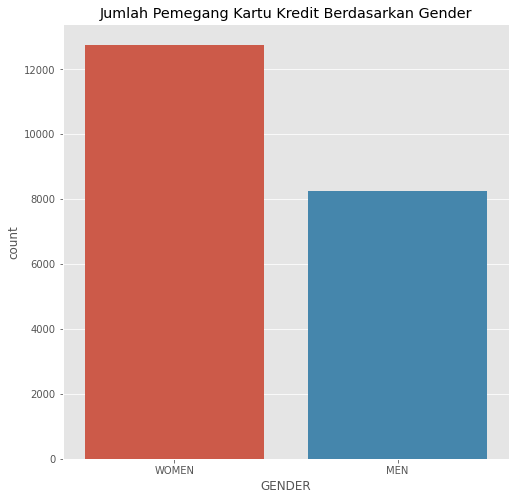

In [34]:
plt.figure(figsize=(8,8))
plt.title('Jumlah Pemegang Kartu Kredit Berdasarkan Gender')
sns.countplot(x="GENDER", data=df1)
plt.show()

In [35]:
df1["GENDER"].value_counts()

WOMEN    12759
MEN       8241
Name: GENDER, dtype: int64

Kami melihat jika pengguna kartu kredit terbanyak adalah perempuan, dengan jumlah 12759 orang. Sedangkan untuk pria, jumlahnya 8241 orang. Selanjutnya adalah melihat manakah dari kedua kategori ini yang memiliki jumlah default paling banyak.

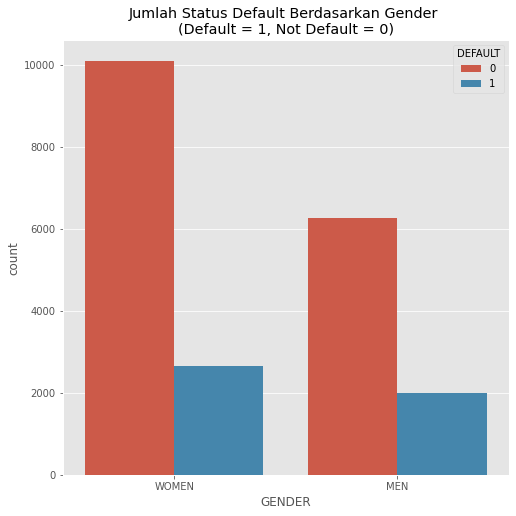

In [36]:
plt.figure(figsize = (8,8))
plt.title('Jumlah Status Default Berdasarkan Gender \n(Default = 1, Not Default = 0)')
ax=sns.countplot(x='GENDER',data=df1,hue="DEFAULT");
locs, labels = plt.xticks()
plt.show()

Jumlah wanita yang terdeteksi default bulan depan lebih banyak ketimbang pria.

### B. Default vs Education

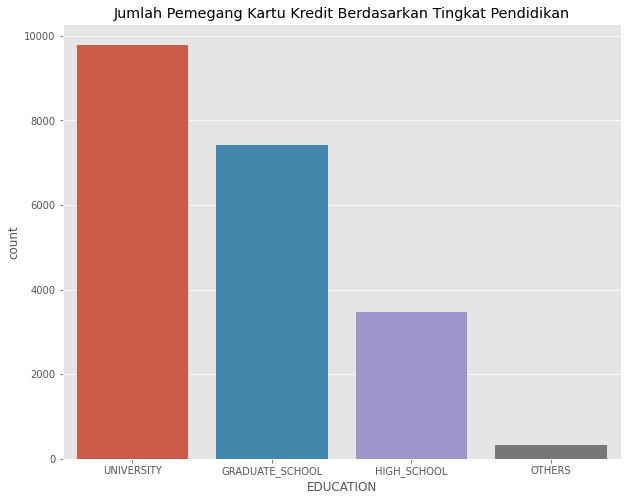

In [37]:
plt.figure(figsize = (10,8))
plt.title('Jumlah Pemegang Kartu Kredit Berdasarkan Tingkat Pendidikan')
sns.countplot(x='EDUCATION',data=df1)

plt.show()

In [38]:
df1["EDUCATION"].value_counts()

UNIVERSITY         9789
GRADUATE_SCHOOL    7415
HIGH_SCHOOL        3467
OTHERS              329
Name: EDUCATION, dtype: int64

Pengguna kartu kredit paling banyak merupakan dari lulusan "university" atau setara S1, kemudian disusul "graduate school" atau setara S2. Lalu disusul "high school" dan "others". Selanjutnya adalah menghitung jumlah pengguna default berdasarkan tingkat pendidikan.

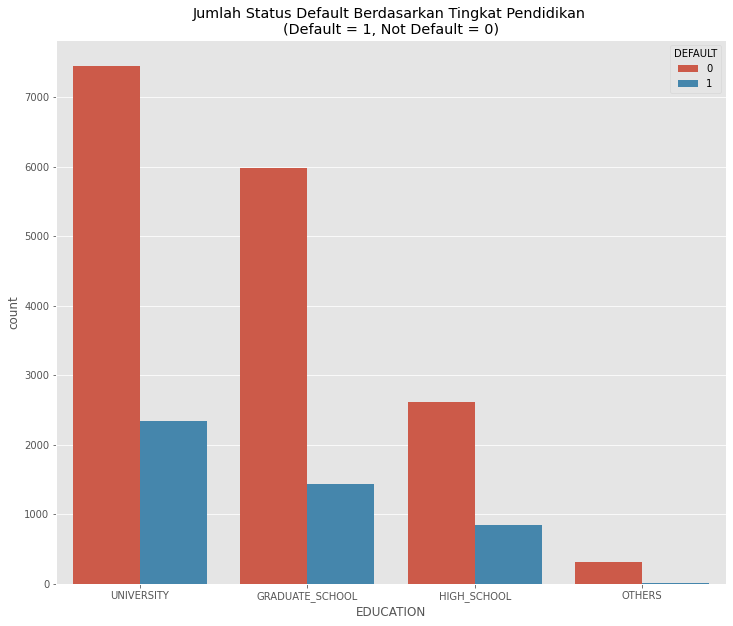

In [39]:
plt.figure(figsize = (12,10))
plt.title('Jumlah Status Default Berdasarkan Tingkat Pendidikan \n(Default = 1, Not Default = 0)')
ax=sns.countplot(x='EDUCATION',data=df1,hue="DEFAULT");
locs, labels = plt.xticks()
plt.show()

Persentase paling besar default berdasarkan tingkat pendidikan berasal dari pengguna kartu kredit dengan lulusan high school dengan persentase sebesar 24.5%. Sedangkan jika dihitung secara jumlah, pengguna pada kategori lulusan university adalah yang paling banyak default dengan jumlah sekitar 2335 orang.

### C. Distribusi Limit Kredit

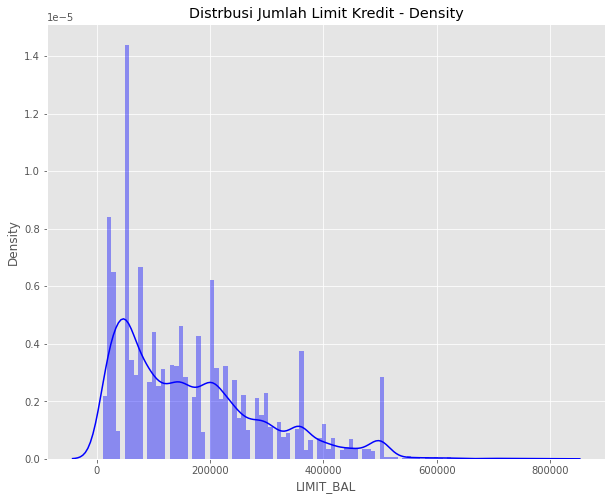

In [40]:
#distribusi limit kredit
plt.figure(figsize = (10,8))
plt.title("Distrbusi Jumlah Limit Kredit - Density")
sns.distplot(df1["LIMIT_BAL"],kde=True,bins=100, color="blue")
plt.show()

In [41]:
#lima teratas jumlah limit kredit di dalam dataset
df1["LIMIT_BAL"].value_counts().head()

50000     2388
20000     1395
80000     1107
30000     1076
200000    1033
Name: LIMIT_BAL, dtype: int64

Tiga jumlah limit kredit paling banyak yang diberikan kepada pengguna kartu kredit adalah sebesar 50000 NT Dollar, 20000 NT Dollar, dan 80000 NT Dollar.

### D. Distribusi Limit Kredit Berdasarkan Gender

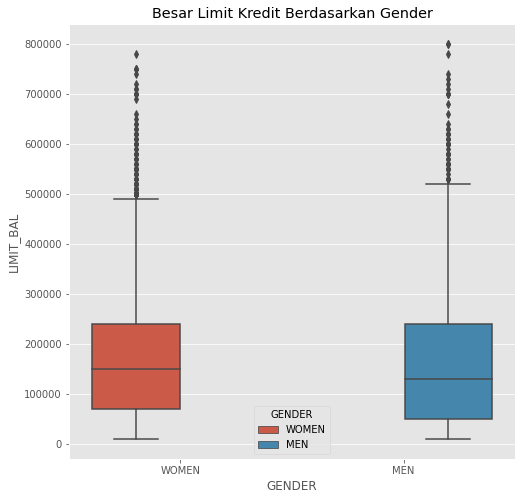

In [42]:
#Limit Kredit vs Gender
plt.figure(figsize = (8,8))
plt.title('Besar Limit Kredit Berdasarkan Gender')
sns.boxplot(x='GENDER', y='LIMIT_BAL', hue='GENDER', data=df1)

plt.show()

In [43]:
import plotly.express as px

fig = px.box(df1, x="GENDER", y="LIMIT_BAL")
fig.update_layout(autosize=False, width=700,height=700,
                  title={
                      'text': "Besar Limit Kredit Berdasarkan Gender",
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'})
fig.show()

Median untuk limit kredit pada gender wanita sebesar 150.000 NT Dollar, sedangan median untuk pria adalah sebesar 130.000 NT Dollar.

### E. Distribusi Limit Kredit Berdasarkan Gender dan Tingkat Pendidikan

In [44]:
fig = px.box(df1, x="GENDER", y="LIMIT_BAL", color="EDUCATION")
fig.update_layout(autosize=False, width=1400,height=700,
                  title={
                      'text': "Besar Limit Kredit Berdasarkan Gender dan Tingkat Pendidikan",
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'})
fig.show()

Pria dan wanita dengan tingkat pendidikan Graduate School mendapatkan median limit kredit paling besar ketimbang tingkat pendidikan lain, yaitu sekitar 200.000 NT Dollar.

### F. Distribusi Limit Kredit Berdasarkan Gender dan Usia

In [45]:
fig = px.box(df1, x="GENDER", y="LIMIT_BAL", color="AGE_GROUP")
fig.update_layout(autosize=False, width=1000,height=700,
                  title={
                      'text': "Besar Limit Kredit Berdasarkan Gender dan Kelompok Usia",
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'})
fig.show()

Wanita pada kelompok usia 30 tahun memiliki median limit kredit terbesar, sekitar 180.000 NT Dollar. Sedangkan untuk pria, pada kelompok usia 60 tahun memiliki median limit kredit terbesar sekitar 200.000 NT Dollar.

### G. Group Age vs Default

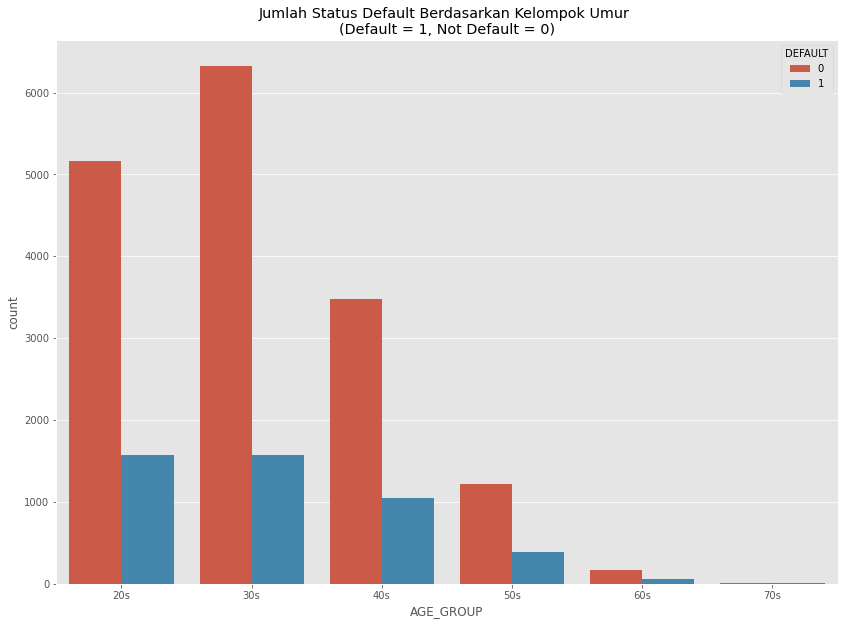

In [46]:
plt.figure(figsize = (14,10))
plt.title('Jumlah Status Default Berdasarkan Kelompok Umur \n(Default = 1, Not Default = 0)')
ax=sns.countplot(x='AGE_GROUP',data=df1,hue="DEFAULT");

    
locs, labels = plt.xticks()
plt.show()

### H. Correlation Menggunakan Heatmap

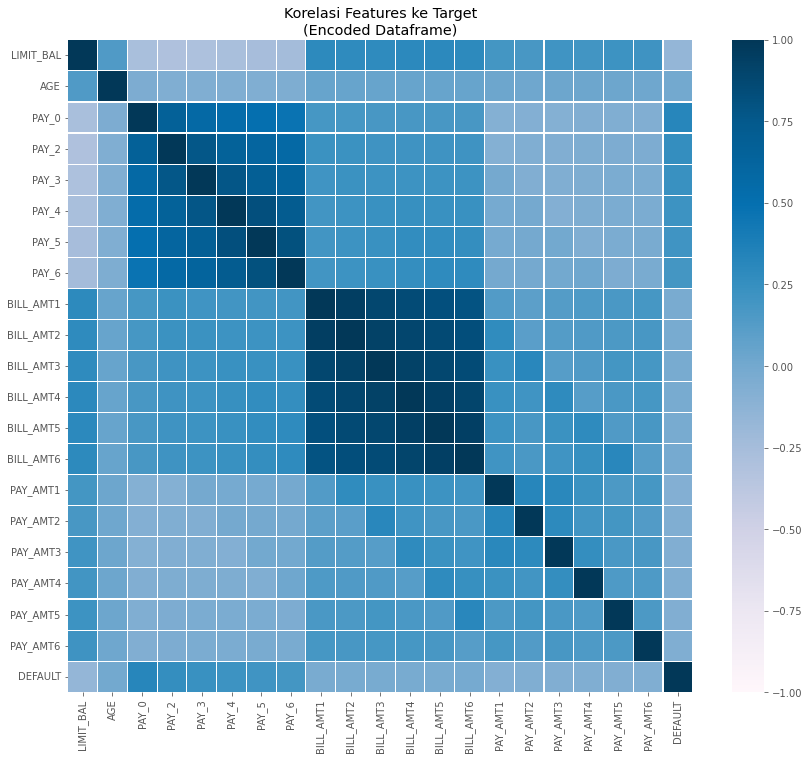

In [47]:
plt.figure(figsize=(14,12))
plt.title('Korelasi Features ke Target\n(Encoded Dataframe)')
corr1 = df1.corr()
sns.heatmap(corr1, xticklabels=corr1.columns, yticklabels=corr1.columns, linewidths=0.1, vmin=-1, vmax=1, cmap="PuBu")
plt.show();

In [48]:
corr1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.000000,0.143206,-0.272059,-0.297323,-0.290059,-0.269652,-0.253399,-0.235601,0.290539,0.283654,0.288947,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
AGE,0.143206,1.000000,-0.043313,-0.055090,-0.058891,-0.057324,-0.061018,-0.050668,0.054186,0.053819,0.053439,0.049968,0.048377,0.047465,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664
PAY_0,-0.272059,-0.043313,1.000000,0.669158,0.573421,0.540895,0.506958,0.472545,0.183120,0.184325,0.173635,0.175132,0.176809,0.172138,-0.085340,-0.070403,-0.079509,-0.065830,-0.061725,-0.065042,0.325851
PAY_2,-0.297323,-0.055090,0.669158,1.000000,0.768036,0.662055,0.621775,0.573462,0.230246,0.229404,0.217190,0.218108,0.217404,0.215069,-0.083156,-0.060032,-0.064262,-0.051836,-0.041990,-0.042252,0.263546
PAY_3,-0.290059,-0.058891,0.573421,0.768036,1.000000,0.780378,0.692843,0.635996,0.205603,0.233152,0.222866,0.224166,0.222599,0.220174,-0.004458,-0.063249,-0.058944,-0.050562,-0.034179,-0.039050,0.235930
PAY_4,-0.269652,-0.057324,0.540895,0.662055,0.780378,1.000000,0.826037,0.720236,0.199066,0.222600,0.240683,0.242503,0.240128,0.236392,-0.014070,-0.001616,-0.073125,-0.046960,-0.032112,-0.031699,0.220079
PAY_5,-0.253399,-0.061018,0.506958,0.621775,0.692843,0.826037,1.000000,0.817923,0.198019,0.219242,0.235586,0.267266,0.265722,0.258212,-0.009026,-0.003200,0.005019,-0.060878,-0.032454,-0.027342,0.208783
PAY_6,-0.235601,-0.050668,0.472545,0.573462,0.635996,0.720236,0.817923,1.000000,0.202287,0.222233,0.235882,0.262535,0.287272,0.281304,-0.002155,-0.004127,0.003651,0.019439,-0.045257,-0.028347,0.188985
BILL_AMT1,0.290539,0.054186,0.183120,0.230246,0.205603,0.199066,0.198019,0.202287,1.000000,0.951243,0.889651,0.856470,0.826714,0.798465,0.138656,0.097091,0.131645,0.153106,0.166235,0.184700,-0.028493
BILL_AMT2,0.283654,0.053819,0.184325,0.229404,0.233152,0.222600,0.219242,0.222233,0.951243,1.000000,0.926553,0.892248,0.860917,0.829886,0.277851,0.106219,0.131176,0.147061,0.160733,0.179634,-0.022796


In [49]:
corr_val = corr1.iloc[:-1, -1:]
corr_val

,DEFAULT
LIMIT_BAL,-0.159163
AGE,0.006664
PAY_0,0.325851
PAY_2,0.263546
PAY_3,0.235930
PAY_4,0.220079
PAY_5,0.208783
PAY_6,0.188985
BILL_AMT1,-0.028493
BILL_AMT2,-0.022796


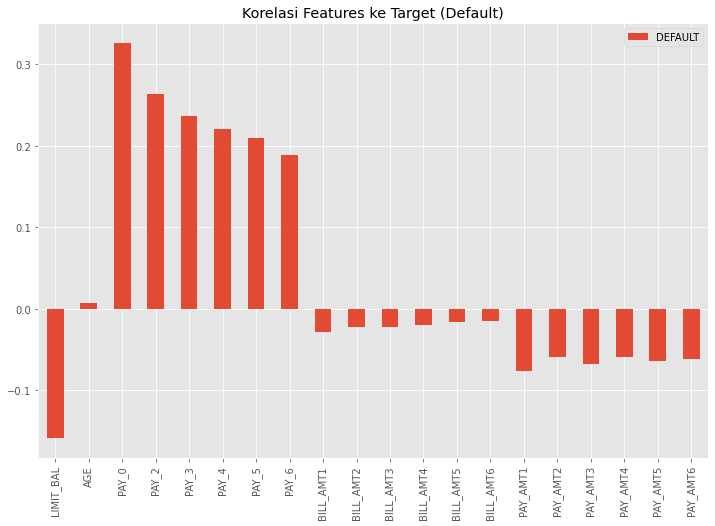

In [50]:
corr_val.plot(kind="bar", figsize=(12,8), title="Korelasi Features ke Target (Default)")


Kolom feature Payment History (`PAY_0` sampai `PAY_6`) memiliki korelasi positif ke kolom target `DEFAULT`. Feature `LIMIT_BAL` memiliki korelasi negatif ke kolom target. Feature lainnya hampir tidak memiliki korelasi ke kolom target.

## **Third Stage: Machine Learning Modeling & Evaluation**

In [51]:
#set fungsi
#credit  to Rezki Trianto
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### A. Split Data

In [52]:
#memisahkan target dengan features
X = df_ohe.drop(labels=['DEFAULT'], axis=1)
y = df_ohe["DEFAULT"]

#splitting 80% untuk train dan 20% untuk test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

#set scaler
scaler = MinMaxScaler() #MinMaxScaler karena dataset memiliki banyak outliers

#scaling
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled  = scaler.transform(Xtest)

In [53]:
#cek splitted data
print("Xtrain: ", Xtrain.shape)
print("Xtest: ", Xtest.shape)
print("ytrain: ", ytrain.shape)
print("ytest: ", ytest.shape)

#cek scaled data
print("Xtrain_scaled: ", Xtrain_scaled.shape)
print("Xtest_scaled: ", Xtest_scaled.shape)

Xtrain:  (16800, 95)
Xtest:  (4200, 95)
ytrain:  (16800,)
ytest:  (4200,)
Xtrain_scaled:  (16800, 95)
Xtest_scaled:  (4200, 95)


### B. Baseline Model

In [54]:
#import packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from imblearn import under_sampling, over_sampling

In [55]:
#set model yang akan digunakan
methods = [KNeighborsClassifier(),
           LogisticRegression(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           lgb.LGBMClassifier(),
           GaussianNB()]

##### **Model Unscaled**

In [56]:
#buat dataframe untuk score
model_no_scale = pd.DataFrame(columns = ["Method Name", "AUC", "Precision", "Accuracy", "F1 Score", "Recall"])

#buat iterasi
for method in methods:
    method.fit(Xtrain, ytrain) #fit model ke training data
    y_pred = method.predict(Xtest)
    
    method_name = str(type(method)).split('.')[-1][:-2]
    
    #AUC
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr)

    #precission
    precision = precision_score(ytest, y_pred)

    #accuracy
    accuracy = accuracy_score(ytest, y_pred)

    #recall
    recall = recall_score(ytest, y_pred)

    #f1
    f1 = f1_score(ytest, y_pred)


    model_no_scale = model_no_scale.append({'Method Name': method_name, 'AUC': AUC,
                                            'Precision': precision, 'Accuracy': accuracy,
                                            'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
#tampilkan model
model_no_scale.style.set_table_attributes("style='display:inline'").set_caption('Baseline Model - No Scale')

,Method Name,AUC,Precision,Accuracy,F1 Score,Recall
0,KNeighborsClassifier,0.549183,0.384289,0.744762,0.252441,0.187954
1,LogisticRegression,0.500000,0.000000,0.770714,0.000000,0.000000
2,DecisionTreeClassifier,0.618778,0.398655,0.720476,0.414172,0.430945
3,RandomForestClassifier,0.660597,0.644599,0.810238,0.481457,0.384216
4,LGBMClassifier,0.659293,0.647788,0.810476,0.479058,0.380062
5,GaussianNB,0.554037,0.252455,0.362619,0.395028,0.907580


##### **Model Scaled**

In [57]:
#buat dataframe untuk score
model_scaled = pd.DataFrame(columns = ["Method Name", "AUC", "Precision", "Accuracy", "F1 Score", "Recall"])

#buat iterasi
for method in methods:
    method.fit(Xtrain_scaled, ytrain) #fit model ke training data
    y_pred = method.predict(Xtest_scaled)
    
    method_name = str(type(method)).split('.')[-1][:-2]
    
    #AUC
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr)

    #precission
    precision = precision_score(ytest, y_pred)

    #accuracy
    accuracy = accuracy_score(ytest, y_pred)

    #recall
    recall = recall_score(ytest, y_pred)

    #f1
    f1 = f1_score(ytest, y_pred)


    model_scaled = model_scaled.append({'Method Name': method_name, 'AUC': AUC,
                                        'Precision': precision, 'Accuracy': accuracy,
                                        'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
#tampilkan model
model_scaled.style.set_table_attributes("style='display:inline'").set_caption('Baseline Model Scaled')

,Method Name,AUC,Precision,Accuracy,F1 Score,Recall
0,KNeighborsClassifier,0.638783,0.557325,0.787857,0.439975,0.363448
1,LogisticRegression,0.655843,0.661682,0.811905,0.472630,0.367601
2,DecisionTreeClassifier,0.615890,0.400798,0.723333,0.408952,0.417445
3,RandomForestClassifier,0.656920,0.633681,0.807381,0.474334,0.379024
4,LGBMClassifier,0.658156,0.642606,0.809286,0.476813,0.379024
5,GaussianNB,0.578458,0.602564,0.785952,0.294902,0.195223


Model tanpa melakukan scaling terlihat memiliki score lebih rendah dari model yang melakukan scaling. Kami akan menggunakan metric AUC untuk menentukan model. Namun karena data highly imbalanced, AUC tidak bisa dipakai untuk menentukan model mana yang paling bagus saat ini. Oleh karena itu akan coba untuk melakukan class imbalance lebih dulu terhadap data kami.

##### **Under Sampling (Scaled)**

In [58]:
X_under, y_under = under_sampling.RandomUnderSampler(random_state=42).fit_resample(Xtrain_scaled, ytrain)

In [59]:
#buat dataframe untuk score
model_under = pd.DataFrame(columns = ["Method Name", "AUC", "Precision", "Accuracy", "F1 Score", "Recall"])

#buat iterasi
for method in methods:
    method.fit(X_under, y_under) #fit model ke training data
    y_pred = method.predict(Xtest_scaled)
    
    method_name = str(type(method)).split('.')[-1][:-2]
    
    #AUC
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr)

    #precission
    precision = precision_score(ytest, y_pred)

    #accuracy
    accuracy = accuracy_score(ytest, y_pred)

    #recall
    recall = recall_score(ytest, y_pred)

    #f1
    f1 = f1_score(ytest, y_pred)


    model_under = model_under.append({'Method Name': method_name, 'AUC': AUC,
                                      'Precision': precision, 'Accuracy': accuracy,
                                      'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
#tampilkan model
model_under.style.set_table_attributes("style='display:inline'").set_caption('Baseline Model - Under Sampling Scaled')

,Method Name,AUC,Precision,Accuracy,F1 Score,Recall
0,KNeighborsClassifier,0.668468,0.380205,0.676190,0.480916,0.654206
1,LogisticRegression,0.704091,0.502708,0.772143,0.537904,0.578401
2,DecisionTreeClassifier,0.611585,0.319847,0.613810,0.419054,0.607477
3,RandomForestClassifier,0.701498,0.440367,0.730476,0.524370,0.647975
4,LGBMClassifier,0.702923,0.430769,0.721429,0.524003,0.668744
5,GaussianNB,0.534415,0.546584,0.774286,0.156584,0.091381


##### **Over Sampling (Scaled)**

In [60]:
X_over, y_over = over_sampling.RandomOverSampler(random_state=42).fit_resample(Xtrain_scaled, ytrain)

In [61]:
#buat dataframe untuk score
model_over = pd.DataFrame(columns = ["Method Name", "AUC", "Precision", "Accuracy", "F1 Score", "Recall"])

#buat iterasi
for method in methods:
    method.fit(X_over, y_over) #fit model ke training data
    y_pred = method.predict(Xtest_scaled)
    
    method_name = str(type(method)).split('.')[-1][:-2]
    
    #AUC
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr)

    #precission
    precision = precision_score(ytest, y_pred)

    #accuracy
    accuracy = accuracy_score(ytest, y_pred)

    #recall
    recall = recall_score(ytest, y_pred)

    #f1
    f1 = f1_score(ytest, y_pred)


    model_over = model_over.append({'Method Name': method_name, 'AUC': AUC,
                                      'Precision': precision, 'Accuracy': accuracy,
                                      'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
#tampilkan model
model_over.style.set_table_attributes("style='display:inline'").set_caption('Baseline Model - Over Sampling Scaled')

,Method Name,AUC,Precision,Accuracy,F1 Score,Recall
0,KNeighborsClassifier,0.634042,0.350610,0.654048,0.441798,0.597092
1,LogisticRegression,0.703739,0.499553,0.770476,0.536984,0.580478
2,DecisionTreeClassifier,0.600468,0.382716,0.716429,0.384496,0.386293
3,RandomForestClassifier,0.680191,0.593197,0.803333,0.513545,0.452752
4,LGBMClassifier,0.708443,0.474268,0.755238,0.538185,0.622015
5,GaussianNB,0.579342,0.603175,0.786190,0.297340,0.197300


##### **SMOTE (Scaled)**

In [62]:
X_smoted, y_smoted = over_sampling.SMOTE(random_state=42).fit_resample(Xtrain_scaled, ytrain)

In [63]:
#buat dataframe untuk score
model_smoted = pd.DataFrame(columns = ["Method Name", "AUC", "Precision", "Accuracy", "F1 Score", "Recall"])

#buat iterasi
for method in methods:
    method.fit(X_smoted, y_smoted) #fit model ke training data
    y_pred = method.predict(Xtest_scaled)
    
    method_name = str(type(method)).split('.')[-1][:-2]
    
    #AUC
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr)

    #precission
    precision = precision_score(ytest, y_pred)

    #accuracy
    accuracy = accuracy_score(ytest, y_pred)

    #recall
    recall = recall_score(ytest, y_pred)

    #f1
    f1 = f1_score(ytest, y_pred)


    model_smoted = model_smoted.append({'Method Name': method_name, 'AUC': AUC,
                                      'Precision': precision, 'Accuracy': accuracy,
                                      'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
#tampilkan model
model_smoted.style.set_table_attributes("style='display:inline'").set_caption('Baseline Model - Over Sampling (SMOTE) Scaled')

,Method Name,AUC,Precision,Accuracy,F1 Score,Recall
0,KNeighborsClassifier,0.653024,0.375644,0.678810,0.463618,0.605400
1,LogisticRegression,0.704975,0.503150,0.772381,0.539055,0.580478
2,DecisionTreeClassifier,0.611559,0.358255,0.684048,0.409435,0.477674
3,RandomForestClassifier,0.685024,0.551643,0.791667,0.517906,0.488058
4,LGBMClassifier,0.675196,0.593007,0.802381,0.505364,0.440291
5,GaussianNB,0.594481,0.604278,0.789286,0.338070,0.234683


Model dengan LGBM Classifier pada data over sampling yang telah discaling memiliki score AUC lebih tinggi daripada model yang lain, yaitu 0.708. Selain itu, model ini juga memiliki score Recall sebesar 0.622, yang berarti semakin mereduce False Negatif. Dengan semakin kecilnya False Negatif, maka semakin banyak juga orang yang akan default yang dapat dideteksi.

**CHOSEN SETTINGS: over sampling scaled**

In [64]:
model_over.style.set_table_attributes("style='display:inline'").set_caption('Baseline Model - Over Sampling Scaled')

,Method Name,AUC,Precision,Accuracy,F1 Score,Recall
0,KNeighborsClassifier,0.634042,0.350610,0.654048,0.441798,0.597092
1,LogisticRegression,0.703739,0.499553,0.770476,0.536984,0.580478
2,DecisionTreeClassifier,0.600468,0.382716,0.716429,0.384496,0.386293
3,RandomForestClassifier,0.680191,0.593197,0.803333,0.513545,0.452752
4,LGBMClassifier,0.708443,0.474268,0.755238,0.538185,0.622015
5,GaussianNB,0.579342,0.603175,0.786190,0.297340,0.197300


### **C. Obtaining Better score on Selected Model (HyperParameter Tuning)**

In [65]:
model = lgb.LGBMClassifier(objective="binary")
model.fit(X_over, y_over)
y_pred = model.predict(Xtest_scaled)

eval_classification(model, y_pred, X_over, y_over, Xtest_scaled, ytest)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.47
Recall (Test Set): 0.62
F1-Score (Test Set): 0.54
AUC: 0.71


In [66]:
print('Classification report untuk LGBM Classifier\n {}'.format(classification_report(ytest, y_pred)))

Classification report untuk LGBM Classifier
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      3237
           1       0.47      0.62      0.54       963

    accuracy                           0.76      4200
   macro avg       0.68      0.71      0.69      4200
weighted avg       0.78      0.76      0.77      4200



Text(137.6666666666668, 0.5, 'Actual')

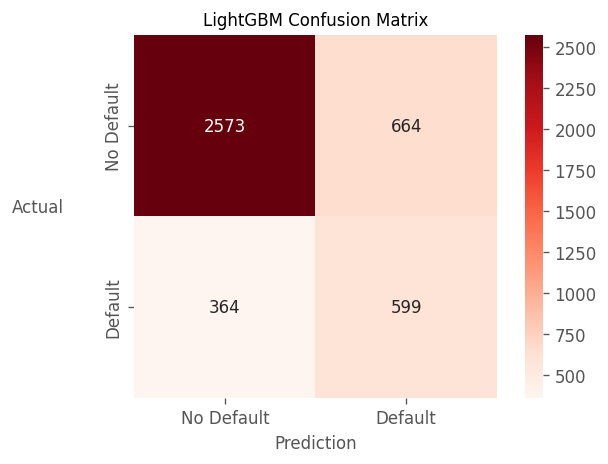

In [67]:
fraud_confusion = confusion_matrix(ytest, y_pred)

fig, ax = plt.subplots(dpi=120)    
g = sns.heatmap(fraud_confusion, cmap=plt.cm.Reds, annot=True, annot_kws={"size":10}, square=True, fmt='d',
                xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default']);

ax.set_yticklabels(g.get_yticklabels(), rotation=90, size=10);
ax.set_xticklabels(g.get_xticklabels(), size=10);

ax.set_title('LightGBM Confusion Matrix', size=10)   
ax.set_xlabel('Prediction', size=10)
ax.set_ylabel('Actual', rotation=0, labelpad=40,size=10)

##### **Optimasi Model**

In [76]:
def train_k_fold(X_over, y_over, FOLDS=5, RANDOM_STATE=42, PARAM_COMBINATION=40):

    lgbm_default = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=450,
                                      max_depth=7, min_child_weight=1, subsample=0.8,
                                      class_weight='balanced', boosting='gbdt')
    lgbm_params = {
        'learning_rate' : [0.1, 0.05, 0.03, 0.01],
        'num_leaves': [6, 30, 50, 100],
        'max_depth': range(3, 5, 1),
        'min_data_in_leaf': [20, 200, 2000],
        'min_child_samples': [100, 300, 500],
        'min_child_weight': [1e-5, 1e-2, 1, 1e2, 1e4],
        'subsample': [i/10.0 for i in range(6, 10)],
        'colsample_bytree': [i/10.0 for i in range(6,10)],
        'reg_alpha' : [0,  1e-5, 1e-2, 1, 10, 50, 100],
        'reg_lambda': [0, 1e-5, 1e-2, 1, 5, 10, 50, 100]
    }

    #init randomizedsearch
    FOLDS = FOLDS
    RANDOM_STATE = RANDOM_STATE
    PARAM_COMBINATION = PARAM_COMBINATION

    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)

    rd_lgbm = RandomizedSearchCV(
        estimator=lgbm_default,
        param_distributions=lgbm_params,
        scoring='roc_auc',
        n_jobs=-1,
        pre_dispatch='2*n_jobs',
        cv=kf.split(X_over, y_over),
        verbose=1,
        random_state=RANDOM_STATE,
        n_iter=PARAM_COMBINATION
        )

    rd_lgbm.fit(X = X_over,
                y = y_over)
    
    lgbm_hyped = lgb.LGBMClassifier(**rd_lgbm.best_estimator_.get_params())

    lgbm_hyped.fit(X = X_over, 
                   y = y_over)
    
    return lgbm_hyped

In [79]:
model_lgbm_tuned = train_k_fold(X_over, y_over, 2, 42, 5)

model_lgbm_tuned.fit(X_over, y_over)
y_pred_train = model_lgbm_tuned.predict(X_over)
y_pred_lgbm = model_lgbm_tuned.predict(Xtest_scaled)

eval_classification(model_lgbm_tuned, y_pred_lgbm, X_over, y_over, Xtest_scaled, ytest)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.4s finished


Accuracy (Test Set): 0.74
Precision (Test Set): 0.46
Recall (Test Set): 0.65
F1-Score (Test Set): 0.54
AUC: 0.71


Text(137.6666666666668, 0.5, 'Actual')

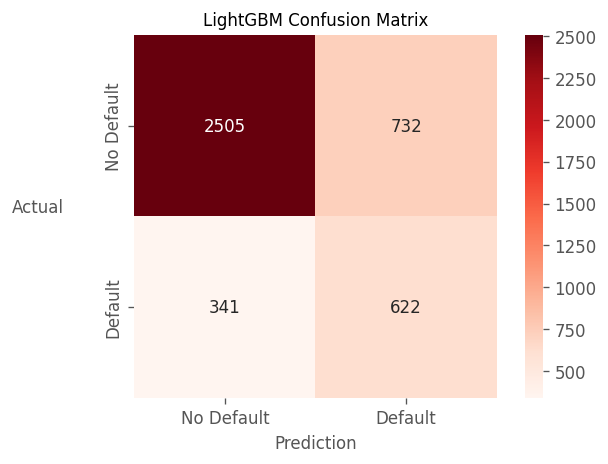

In [80]:
fraud_confusion = confusion_matrix(ytest, y_pred_lgbm)

fig, ax = plt.subplots(dpi=120)    
g = sns.heatmap(fraud_confusion, cmap=plt.cm.Reds, annot=True, annot_kws={"size":10}, square=True, fmt='d',
                xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default']);

ax.set_yticklabels(g.get_yticklabels(), rotation=90, size=10);
ax.set_xticklabels(g.get_xticklabels(), size=10);

ax.set_title('LightGBM Confusion Matrix', size=10)   
ax.set_xlabel('Prediction', size=10)
ax.set_ylabel('Actual', rotation=0, labelpad=40,size=10)

In [71]:
#cek overfitting
print("Train score: " + str(model_lgbm_tuned.score(X_over, y_over)))
print("Test score: " + str(model_lgbm_tuned.score(Xtest_scaled, ytest)))

Train score: 0.7472556792193932
Test score: 0.7445238095238095


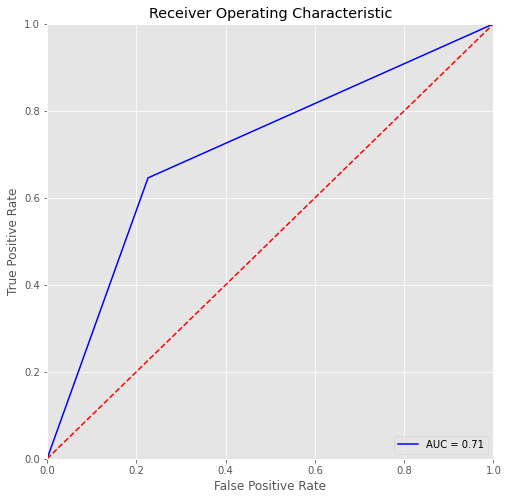

In [72]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_lgbm, pos_label=1)
AUC = roc_auc_score(ytest, y_pred_lgbm)

plt.figure(figsize = (8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **D. Features Importance**

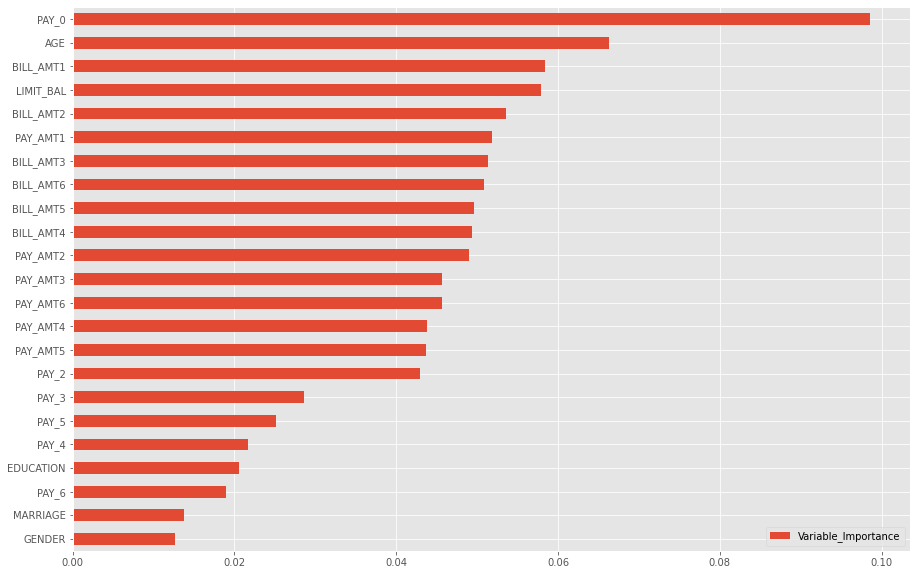

In [73]:
#memisahkan features dan target
features = df_ohe[['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
               'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]]

target = df_ohe['DEFAULT']

#Split data
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size = 0.2, random_state=42) # 20% holdout 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=42) # Train/Val

#Set scaler
scaler = MinMaxScaler()
scaler.fit(X_train_val.values)

## Scaling
X_train_val_scaled = scaler.transform(X_train_val.values) 

#set model
model = RandomForestClassifier() 
model.fit(X_train_val_scaled, y_train_val) 

feature_importance = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)

feature_importance.plot.barh(figsize=(15,10))